# Analysis pipeline for Gating

## Preliminaries

In [1]:
%cd ~/code/textrec/

/Users/kcarnold/code/textrec


In [2]:
%matplotlib inline
import datetime
import json
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import toolz
from IPython.display import Image, HTML

In [3]:
from textrec.paths import paths
from textrec import analysis_util, util, notebook_util, automated_analyses
reload(analysis_util), reload(util), reload(notebook_util), reload(automated_analyses)
from textrec.notebook_util import images, id2img, id2url, show_images

Loading COCO captions
Loading COCO id2url
Done


/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading ONMT models...
coco_lm_adam_acc_46.00_ppl_16.32_e10_nooptim.pt
Loading model parameters.
coco_cap_adam_acc_48.73_ppl_12.56_e10_nooptim.pt
Loading model parameters.
Ready.
Loading SpaCy...done
Loading COCO captions
Loading COCO id2url
Done
Loading SpaCy...done


In [4]:
# HTML(show_images([images_by_split['val'][0]['cocoid']]))

## Load results of writing experiment

Prerequisites: Run `textrec.logs_to_csv {batch_name}` and `textrec.gruntwork {batch_name}`.

In [23]:
batch = 'gc1'
experiment_level_data = pd.read_csv(paths.analyzed / f'experiment_{batch}.csv')
block_level_data = pd.read_csv(paths.analyzed / f'block_{batch}.csv')
trial_level_data = pd.read_csv(paths.analyzed / f'trial_withmanual_{batch}.csv')
helpful_ranks_by_condition = pd.read_csv(paths.analyzed / f'helpful_ranks_by_condition_{batch}.csv')

In [24]:
helpful_ranks_by_condition.set_index('index')

,accurate-least-condition,accurate-most-condition,quick-least-condition,quick-most-condition,specific-least-condition,specific-most-condition
index,,,,,,
always,0,14,0,14,0,13
gated,2,3,2,3,0,4
norecs,15,0,15,0,17,0


In [6]:
HTML("Each of {num_participants} participants ({non_male} non-male) completed {num_trials_per} trials per experiment, for a total of {n_trials} trials.".format(
    num_participants=len(set(trial_level_data.participant)),
    non_male=(experiment_level_data.gender == 'Male').sum(),
    num_trials_per=trial_level_data.groupby('participant').size().mean(),
    n_trials=len(trial_level_data)))

In [7]:
HTML("Participants spent {total_time_mean:.1f} +- {total_time_std:.1f} minutes total.".format(
    total_time_mean=experiment_level_data.total_time.mean(),
    total_time_std=experiment_level_data.total_time.std()))

In [8]:
def summarize_means(df, by, outcome):
    return ', '.join(f'{name}={group_mean:.2f}' for name, group_mean in df.groupby(by)[outcome].mean().iteritems())

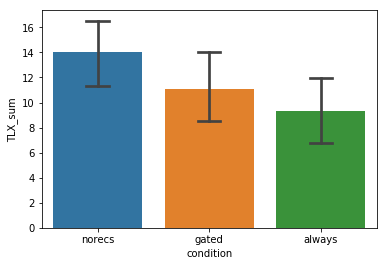

In [9]:
sns.barplot(x='condition', y='TLX_sum', data=block_level_data, capsize=.2)
HTML("The average cognitive load was higher in the no-recommendations condition ({})".format(
    summarize_means(block_level_data, 'condition', 'TLX_sum')))

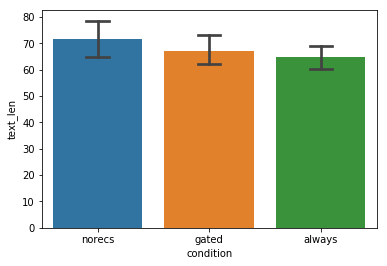

In [11]:
sns.barplot(x='condition', y='text_len', data=trial_level_data, capsize=.2);
HTML("Text length was slightly longer in no-recommendations ({}).".format(
    summarize_means(trial_level_data, 'condition', 'text_len')))

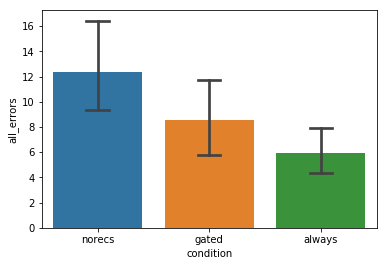

In [14]:
sns.barplot(x='condition', y='all_errors', data=trial_level_data, capsize=.2)
HTML("Participants made more errors (corrected + uncorrected) in the no-recommendations condition ({}).".format(
    summarize_means(trial_level_data, 'condition', 'all_errors')))

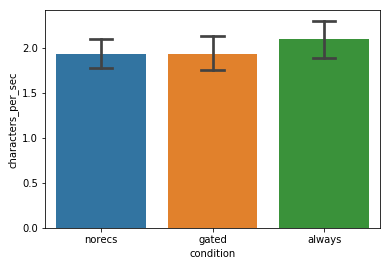

In [15]:
sns.barplot(x='condition', y='characters_per_sec', data=trial_level_data, capsize=.2)
HTML("Participants were slightly faster in the recommendations conditions (characters per second: {}).".format(
    summarize_means(trial_level_data, 'condition', 'characters_per_sec')))

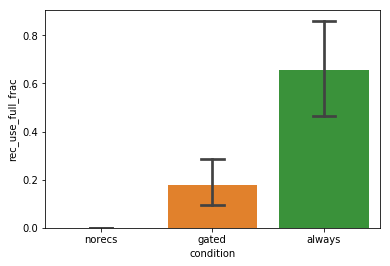

In [22]:
sns.barplot(x='condition', y='rec_use_full_frac', data=trial_level_data, capsize=.2)
HTML("Participants used available recommendations much more often when they were always shown (use rate: {}).".format(
    summarize_means(trial_level_data, 'condition', 'rec_use_full_frac')))

In [17]:
print('\n\n'.join(x for x in experiment_level_data['techDiff'] if x is not None))

No

None

None

No

None

None

None

No

no

No

No

None

No

No

No

No

No


In [20]:
print('\n\n'.join(x for x in experiment_level_data['other'] if isinstance(x, str)))

None

None

None

It went well

None

None

None

All is well

None

None

None

The keys seemed so tiny in all three. It was hard to type. 

None

Great, enjoyed it!

I enjoyed the experience
